## Implementation of Regularization
- to reduce overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

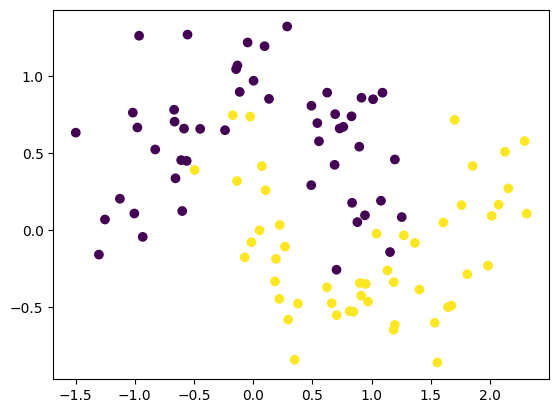

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.6695 - loss: 0.6527 - val_accuracy: 0.9000 - val_loss: 0.3743
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7891 - loss: 0.4453 - val_accuracy: 0.9000 - val_loss: 0.2079
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8367 - loss: 0.3987 - val_accuracy: 0.9000 - val_loss: 0.1940
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8547 - loss: 0.3695 - val_accuracy: 0.9000 - val_loss: 0.2256
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8391 - loss: 0.3912 - val_accuracy: 0.9000 - val_loss: 0.2461
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8344 - loss: 0.3383 - val_accuracy: 0.9000 - val_loss: 0.2567
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8469 - loss: 0.3488 - val_accuracy: 0.9000 - val_loss: 0.2565
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8484 - loss: 0.3316 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


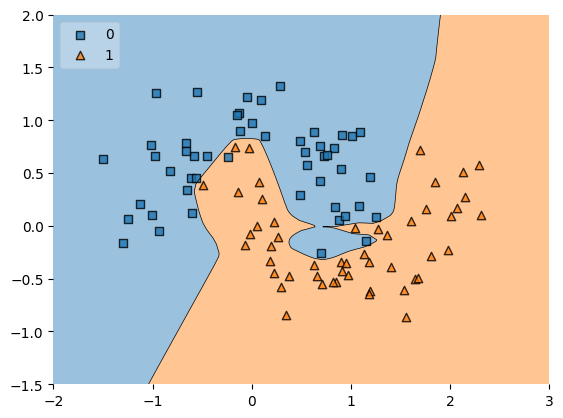

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

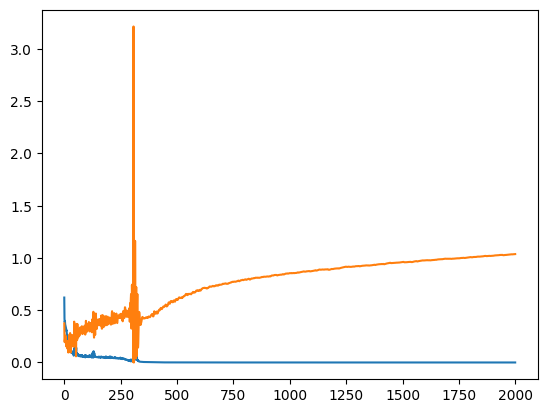

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

## Using L1 (Lasso) Regularization

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.5945 - loss: 1.8591 - val_accuracy: 0.9000 - val_loss: 1.3769
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8344 - loss: 1.3586 - val_accuracy: 0.9000 - val_loss: 0.9895
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8664 - loss: 1.0605 - val_accuracy: 0.9000 - val_loss: 0.7667
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8484 - loss: 0.8645 - val_accuracy: 0.9000 - val_loss: 0.6951
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8352 - loss: 0.7746 - val_accuracy: 0.9000 - val_loss: 0.6791
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8500 - loss: 0.6820 - val_accuracy: 0.9000 - val_loss: 0.6307
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8523 - loss: 0.6663 - val_accuracy: 0.9000 - val_loss: 0.5331
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8289 - loss: 0.6417 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


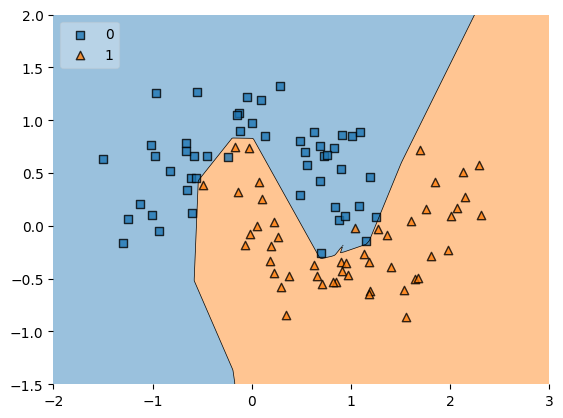

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

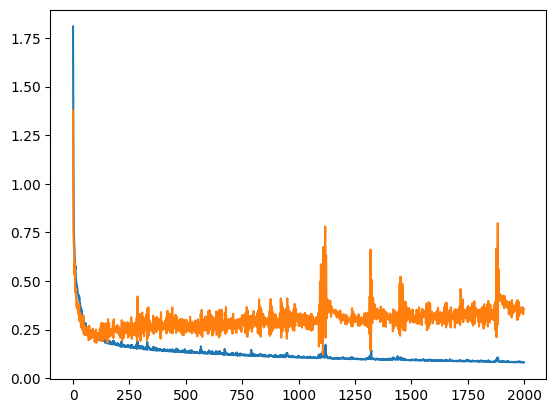

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [12]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

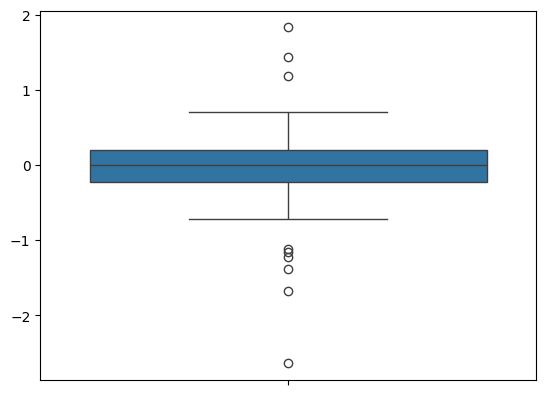

In [13]:
sns.boxplot(model1_weight_layer1)

<Axes: >

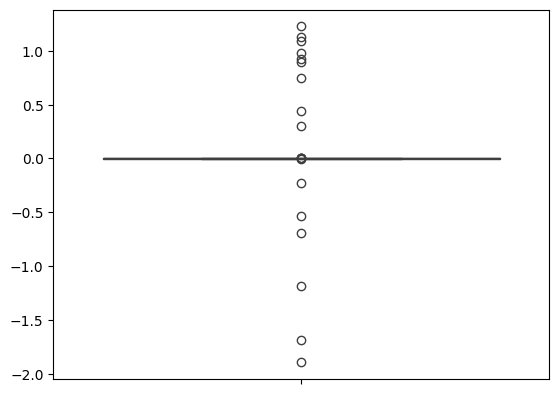

In [14]:
sns.boxplot(model2_weight_layer1)

In [15]:
model1_weight_layer1.min()

np.float32(-2.6418688)

In [16]:
model2_weight_layer1.min()

np.float32(-1.8934846)

In [17]:
model1.get_weights()[0].reshape(256)

array([ 7.25166053e-02,  2.45931491e-01, -3.31322514e-02, -8.16857256e-03,
        2.48684570e-01, -4.45014358e-01,  3.40495229e-01,  4.98141825e-01,
        2.33150810e-01,  1.96779184e-02,  7.79045969e-02, -3.41669798e-01,
       -5.86778879e-01, -3.80218536e-01, -2.36969516e-01,  3.09578598e-01,
       -2.74260044e-02,  1.04578033e-01,  1.41761899e-01, -4.21401680e-01,
       -3.04284900e-01, -5.53190053e-01, -3.71004939e-02, -1.60064325e-01,
        2.78807670e-01,  2.56617427e-01,  2.21637517e-01,  1.00741880e-02,
       -4.09624755e-01,  7.26093128e-02, -3.39450151e-01,  8.44060630e-02,
        3.20313394e-01, -4.90452796e-01,  1.01855106e-03,  4.56214458e-01,
       -5.33350587e-01, -5.61245143e-01, -3.98598850e-01, -2.78097391e-01,
        2.62051582e-01,  2.99651831e-01,  2.24893391e-01,  7.04136640e-02,
        2.80205399e-01,  2.77036428e-01, -5.42881310e-01,  3.31808388e-01,
       -8.35600644e-02, -3.00237209e-01,  5.04775066e-03, -5.00495136e-01,
       -1.39336750e-01, -

## L2 regularization

In [18]:
model3 = Sequential()

model3.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.03)))
model3.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
adam = Adam(learning_rate=0.01)
model3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model3.fit(X, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.8039 - loss: 2.5805 - val_accuracy: 0.9000 - val_loss: 2.0140
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8047 - loss: 1.9626 - val_accuracy: 0.9000 - val_loss: 1.5030
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8047 - loss: 1.5242 - val_accuracy: 0.9000 - val_loss: 1.1562
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8578 - loss: 1.1905 - val_accuracy: 0.9000 - val_loss: 0.9390
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8625 - loss: 1.0172 - val_accuracy: 0.8500 - val_loss: 0.9445
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7727 - loss: 0.9529 - val_accuracy: 0.9000 - val_loss: 0.8376
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8242 - loss: 0.8657 - val_accuracy: 0.9000 - val_loss: 0.7271
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8547 - loss: 0.8155 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 919us/step


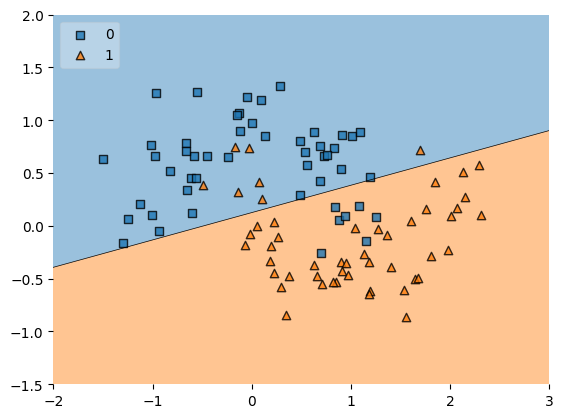

In [20]:
plot_decision_regions(X, y.astype('int'), clf=model3, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

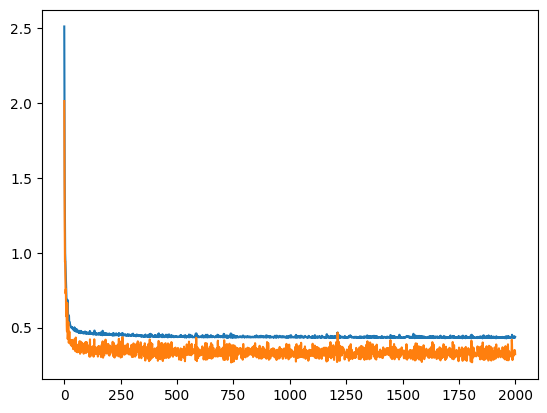

In [21]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])